In [137]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [138]:
#Chargement du fichier dispo_alimentaire
dispo_alimentaire=pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [139]:
#Chargement du fichier population
population=pd.read_csv('Population_2000_2018.csv')

In [140]:
#Chargement du fichier stabilité politique 
stabilité_politique=pd.read_csv('stabilité_politique.csv',sep=';')

In [141]:
#Chargement du fichier PIB
pib_fichier=pd.read_csv('pib_2017.csv',sep=';')

## 1 Etude du fichier dispo_alimentaire

In [142]:
#Affichage du fichier dispo_alimentaire
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [143]:
#Vérification de la composition du colonne Element 
dispo_alimentaire['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [144]:
#Vérification des pays existants dans le fichier dispo_alimentaire
dispo_alimentaire['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bermudes', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark',
       'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Espagne', 'Estonie',
       'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Gé

In [145]:
#Vérification des produits existants dans le fichier dispo_alimentaire 
dispo_alimentaire['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [146]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [147]:
#Verification des doublons sur le fichier dispo_alimentaire 
dispo_alimentaire[['Zone','Élément','Produit']].duplicated().value_counts()

False    176600
dtype: int64

In [148]:
#fonction pour tester si le clé est unique ou non
def tester_unicite(df, colonnes):

    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé est unique dans le dataframe donc c'est une clé primaire.")
    else :
        print("La clé n'est pas unique dans le dataframe  donc ce n'est pas une clé primaire.")
    

In [149]:
#Tester l’unicité des clés
tester_unicite(dispo_alimentaire,['Zone','Élément','Produit'])

La clé est unique dans le dataframe donc c'est une clé primaire.


In [150]:
#Création data frame dispo_alimentaire_volailles
dispo_alimentaire_volailles=dispo_alimentaire.loc[dispo_alimentaire['Produit']== 'Viande de Volailles',['Zone','Élément','Unité','Valeur']]

In [151]:
#Affichage de la dataframe dispo_alimentaire_volailles
dispo_alimentaire_volailles.head()

,Zone,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.0
653,Afghanistan,Variation de stock,Milliers de tonnes,0.0
654,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.0
655,Afghanistan,Pertes,Milliers de tonnes,2.0


In [152]:
dispo_alimentaire_volailles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 651 to 176400
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     2061 non-null   object 
 1   Élément  2061 non-null   object 
 2   Unité    2061 non-null   object 
 3   Valeur   2061 non-null   float64
dtypes: float64(1), object(3)
memory usage: 80.5+ KB


In [153]:
#Vérification des élements dans dispo_alimentaire_volailles
dispo_alimentaire_volailles['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [154]:
#Création d'une liste ou je vais garder que les élements que je vais étudier
liste=['Production', 'Importations - Quantité','Variation de stock','Disponibilité intérieure','Exportations - Quantité','Disponibilité de protéines en quantité (g/personne/jour)']

In [155]:
#Création d'un dataframe aves les élement de la liste créee
data=dispo_alimentaire_volailles.loc[dispo_alimentaire_volailles['Élément'].isin(liste),:]

In [156]:
#Affichage de la datafame Data
data.head()

,Zone,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.54


In [157]:
#Fractionner la colonne Element du fichier data
dispo_alimentaire_volailles_1=pd.pivot_table(data,index='Zone',columns='Élément').reset_index()

C:\Users\hajer\AppData\Local\Temp\ipykernel_30976\1615375520.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  dispo_alimentaire_volailles_1=pd.pivot_table(data,index='Zone',columns='Élément').reset_index()


In [158]:
#Affichage de la data aprés la fraction des colonnes 
dispo_alimentaire_volailles_1.head()

Zone  \
Élément                   
0           Afghanistan   
1        Afrique du Sud   
2               Albanie   
3               Algérie   
4             Allemagne   

                                                          Valeur  \
Élément Disponibilité de protéines en quantité (g/personne/jour)   
0                                                     0.54         
1                                                    14.11         
2                                                     6.26         
3                                                     1.97         
4                                                     7.96         

                                                          \
Élément Disponibilité intérieure Exportations - Quantité   
0                           57.0                     NaN   
1                         2118.0                    63.0   
2                           47.0                     0.0   
3                          277.0                     0.0   
4                         1739.0                   646.0   

                                                               
Élément Importations - Quantité Production Variation de stock  
0                          29.0       28.0                0.0  
1                         514.0     1667.0                0.0  
2                          38.0       13.0                4.0  
3                           2.0      275.0                0.0  
4                         842.0     1514.0              -29.0

In [159]:
#Nommer les nouvelles colonnes aprés la fraction
dispo_alimentaire_volailles_1.columns=['Zone','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité'
                                     ,'Importations - Quantité','Production','Variation de stock']

In [160]:
#Affichade de dispo_alimentaire_volailles_1
dispo_alimentaire_volailles_1.head()

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,0.54,57.0,NaN,29.0,28.0,0.0
1,Afrique du Sud,14.11,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,6.26,47.0,0.0,38.0,13.0,4.0
3,Algérie,1.97,277.0,0.0,2.0,275.0,0.0
4,Allemagne,7.96,1739.0,646.0,842.0,1514.0,-29.0


In [161]:
dispo_alimentaire_volailles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      172 non-null    object 
 1   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 2   Disponibilité intérieure                                  170 non-null    float64
 3   Exportations - Quantité                                   135 non-null    float64
 4   Importations - Quantité                                   170 non-null    float64
 5   Production                                                168 non-null    float64
 6   Variation de stock                                        169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


In [162]:
#Affichage des pays qui n'exporte pas des volailles
dispo_alimentaire_volailles_1.loc[dispo_alimentaire_volailles_1['Exportations - Quantité'].isnull(),:]

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,0.54,57.0,NaN,29.0,28.0,0.0
13,Bahamas,14.61,26.0,NaN,24.0,6.0,4.0
14,Bangladesh,0.47,250.0,NaN,0.0,249.0,0.0
23,Burkina Faso,0.77,46.0,NaN,0.0,46.0,0.0
26,Cabo Verde,6.52,10.0,NaN,12.0,1.0,4.0
27,Cambodge,0.74,38.0,NaN,10.0,28.0,0.0
40,Cuba,7.12,342.0,NaN,312.0,29.0,-1.0
43,Djibouti,0.92,3.0,NaN,3.0,NaN,0.0
54,Gambie,1.24,8.0,NaN,16.0,2.0,10.0
56,Grenade,15.50,8.0,NaN,7.0,1.0,0.0


## 2.Etude du fichier population

In [163]:
#Affichage du fichier population
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [164]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [165]:
#Tester l’unicité des clés fichier population
tester_unicite(population,['Zone','Année'])

La clé est unique dans le dataframe donc c'est une clé primaire.


In [166]:
#Création de la data frame population_2017
population2017=population.loc[population['Année']==2017,['Zone','Unité','Valeur']]

In [167]:
#Affichage de population_2017
population2017.head()

,Zone,Unité,Valeur
17,Afghanistan,1000 personnes,36296.113
36,Afrique du Sud,1000 personnes,57009.756
55,Albanie,1000 personnes,2884.169
74,Algérie,1000 personnes,41389.189
93,Allemagne,1000 personnes,82658.409


In [168]:
#Renommer la colonne Valeur par population
population2017.rename(columns = {'Valeur' : 'population'} ,inplace=True)

In [169]:
#Affichage de population2017
population2017.head()

,Zone,Unité,population
17,Afghanistan,1000 personnes,36296.113
36,Afrique du Sud,1000 personnes,57009.756
55,Albanie,1000 personnes,2884.169
74,Algérie,1000 personnes,41389.189
93,Allemagne,1000 personnes,82658.409


In [170]:
#Multiplication de la colonne population par 1000 pour avoir le nombre de la population total 
population2017['population']=population2017['population']*1000

In [171]:
#Affichage population2017
population2017.head()

,Zone,Unité,population
17,Afghanistan,1000 personnes,36296113.0
36,Afrique du Sud,1000 personnes,57009756.0
55,Albanie,1000 personnes,2884169.0
74,Algérie,1000 personnes,41389189.0
93,Allemagne,1000 personnes,82658409.0


In [172]:
#Supression de la colonne unité
del(population2017['Unité'])

In [173]:
population2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 17 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   population  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [174]:
#Jointure entre fichier dispo_alimentaire et population
population_dispo_alimentaire=pd.merge(population2017,dispo_alimentaire_volailles_1,on=('Zone'),how='outer',indicator= True)

In [175]:
population_dispo_alimentaire['_merge'].value_counts()

both          172
left_only      64
right_only      0
Name: _merge, dtype: int64

In [176]:
#Vérification des pays qui existe seulement dans le fichier population
population_dispo_alimentaire.loc[population_dispo_alimentaire['_merge']=='left_only',:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,_merge
5,Andorre,77001.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,Anguilla,14584.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,Antilles néerlandaises (ex),275186.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
13,Aruba,105366.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
18,Bahreïn,1494076.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
208,Somalie,14589179.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
210,Soudan du Sud,10910763.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
221,Tokélaou,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
222,Tonga,101998.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [177]:
population_dispo_alimentaire=population_dispo_alimentaire.loc[population_dispo_alimentaire['_merge']=='both',:]

In [178]:
population_dispo_alimentaire.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,_merge
0,Afghanistan,36296113.0,0.54,57.0,NaN,29.0,28.0,0.0,both
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,0.0,both
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4.0,both
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,0.0,both
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,-29.0,both


In [179]:
del(population_dispo_alimentaire['_merge'])

## 3 Etude du fichier_pib

In [180]:
#Affichage de pib_fichier
pib_fichier.head()

,Zone,Unité,Produit,Année,Valeur
0,Afghanistan,Valeur US $ par habitant,Produit Intérieur Brut,2017,530.149831
1,Afrique du Sud,Valeur US $ par habitant,Produit Intérieur Brut,2017,6723.928582
2,Albanie,Valeur US $ par habitant,Produit Intérieur Brut,2017,4521.752217
3,Algérie,Valeur US $ par habitant,Produit Intérieur Brut,2017,4134.936055
4,Allemagne,Valeur US $ par habitant,Produit Intérieur Brut,2017,44670.222282


In [181]:
pib_fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     210 non-null    object 
 1   Unité    210 non-null    object 
 2   Produit  210 non-null    object 
 3   Année    210 non-null    int64  
 4   Valeur   210 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB


In [182]:
#tester l'unicité de la clé
tester_unicite(pib_fichier,'Zone')

La clé est unique dans le dataframe donc c'est une clé primaire.


In [183]:
pib_fichier.tail(50)

,Zone,Unité,Produit,Année,Valeur
160,République de Moldova,Valeur US $ par habitant,Produit Intérieur Brut,2017,3040.315517
161,République démocratique du Congo,Valeur US $ par habitant,Produit Intérieur Brut,2017,446.618447
162,République démocratique populaire lao,Valeur US $ par habitant,Produit Intérieur Brut,2017,2439.462412
163,République dominicaine,Valeur US $ par habitant,Produit Intérieur Brut,2017,7513.497951
164,République populaire démocratique de Corée,Valeur US $ par habitant,Produit Intérieur Brut,2017,680.534037
165,République-Unie de Tanzanie,Valeur US $ par habitant,Produit Intérieur Brut,2017,972.626009
166,Roumanie,Valeur US $ par habitant,Produit Intérieur Brut,2017,10667.990723
167,Royaume-Uni de Grande-Bretagne et d'Irlande du...,Valeur US $ par habitant,Produit Intérieur Brut,2017,40617.679070
168,Rwanda,Valeur US $ par habitant,Produit Intérieur Brut,2017,756.546025
169,Sainte-Lucie,Valeur US $ par habitant,Produit Intérieur Brut,2017,11270.809200


In [184]:
pib_fichier=pib_fichier[['Zone','Valeur']]

In [185]:
#Renommer la colonne Valeur par Pib_par_habitant
pib_fichier =pib_fichier.rename(columns={'Valeur':'Pib_par_habitant'})

In [186]:
pib_fichier.head()

,Zone,Pib_par_habitant
0,Afghanistan,530.149831
1,Afrique du Sud,6723.928582
2,Albanie,4521.752217
3,Algérie,4134.936055
4,Allemagne,44670.222282


In [187]:
#jointure entre fichier population_dispo_alimentaire et pib_fichier
population_dispo_alimentaire_pib=pd.merge(population_dispo_alimentaire,pib_fichier,on=('Zone'),how='left')

In [188]:
#Affichage de la data frame population_dispo_alimentaire_pib
population_dispo_alimentaire_pib.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant
0,Afghanistan,36296113.0,0.54,57.0,NaN,29.0,28.0,0.0,530.149831
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,0.0,6723.928582
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4.0,4521.752217
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,0.0,4134.936055
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,-29.0,44670.222282


In [189]:
#Affichage population_dispo_alimentaire_pib
population_dispo_alimentaire_pib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      172 non-null    object 
 1   population                                                172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  170 non-null    float64
 4   Exportations - Quantité                                   135 non-null    float64
 5   Importations - Quantité                                   170 non-null    float64
 6   Production                                                168 non-null    float64
 7   Variation de stock                                        169 non-null    float64
 8   Pib_par_habitant     

## 4 Etude du fichier_stabilité politique 

In [190]:
stabilité_politique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    3290 non-null   object 
 1   Année   3290 non-null   int64  
 2   Valeur  3290 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [191]:
#Affichage stabilité politique
stabilité_politique.head()

,Zone,Année,Valeur
0,Pays-Bas (Royaume des),2000,1.76
1,Pays-Bas (Royaume des),2002,1.30
2,Pays-Bas (Royaume des),2003,1.16
3,Pays-Bas (Royaume des),2004,1.02
4,Pays-Bas (Royaume des),2005,0.99


In [192]:
#Création de la data frame stabilité_politique2017
stabilité_politique2017=stabilité_politique.loc[stabilité_politique['Année']==2017,:]

In [193]:
#Affichage stabilité_politique2017
stabilité_politique2017.head()

,Zone,Année,Valeur
16,Pays-Bas (Royaume des),2017,0.92
33,Afghanistan,2017,-2.80
50,Afrique du Sud,2017,-0.28
67,Albanie,2017,0.38
84,Algérie,2017,-0.92


In [194]:
#Renommer la colonne Valeur par stabilité_politique
stabilité_politique2017=stabilité_politique2017.rename(columns={'Valeur':'stabilité_politique'})

In [195]:
#tester l'unicité de la clé du fichier stabilité_politique_2017
tester_unicite(stabilité_politique2017,'Zone')

La clé est unique dans le dataframe donc c'est une clé primaire.


In [196]:
#jointure entre population_dispo_alimentaire_pib et stabilité politique2017
population_dispo_alimentaire_pib_stabilité_politique2017=pd.merge(population_dispo_alimentaire_pib,stabilité_politique2017,on=('Zone'),how='left')

In [197]:
#Affichage population_dispo_alimentaire_pib_stabilité_politique2017
population_dispo_alimentaire_pib_stabilité_politique2017.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,Année,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,NaN,29.0,28.0,0.0,530.149831,2017.0,-2.80
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,0.0,6723.928582,2017.0,-0.28
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4.0,4521.752217,2017.0,0.38
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,0.0,4134.936055,2017.0,-0.92
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,-29.0,44670.222282,2017.0,0.59


In [198]:
population_dispo_alimentaire_pib_stabilité_politique2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      172 non-null    object 
 1   population                                                172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  170 non-null    float64
 4   Exportations - Quantité                                   135 non-null    float64
 5   Importations - Quantité                                   170 non-null    float64
 6   Production                                                168 non-null    float64
 7   Variation de stock                                        169 non-null    float64
 8   Pib_par_habitant    

In [199]:
#Supression de la colonne Année
del(population_dispo_alimentaire_pib_stabilité_politique2017['Année'])

In [200]:
#Affichage population_dispo_alimentaire_pib_stabilité_politique2017
population_dispo_alimentaire_pib_stabilité_politique2017.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,NaN,29.0,28.0,0.0,530.149831,-2.80
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,0.0,6723.928582,-0.28
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4.0,4521.752217,0.38
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,0.0,4134.936055,-0.92
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,-29.0,44670.222282,0.59


In [201]:
#Tester l'unicité de la clé primaire 
tester_unicite(population_dispo_alimentaire_pib_stabilité_politique2017,'Zone')

La clé est unique dans le dataframe donc c'est une clé primaire.


In [202]:
#Renommer population_dispo_alimentaire_pib_stabilité_politique2017 par df
df=population_dispo_alimentaire_pib_stabilité_politique2017

In [203]:
#Vérification des valeurs manquantes 
df.isna().sum()

Zone                                                         0
population                                                   0
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité intérieure                                     2
Exportations - Quantité                                     37
Importations - Quantité                                      2
Production                                                   4
Variation de stock                                           3
Pib_par_habitant                                             3
stabilité_politique                                          5
dtype: int64

In [204]:
#Vérification des valeures manquantes dans disponibilité interieure 
df.loc[df['Disponibilité intérieure'].isnull(),:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
119,Ouzbékistan,31959785.0,0.63,NaN,NaN,NaN,NaN,NaN,1943.340034,-0.24
132,République démocratique populaire lao,6953035.0,3.59,NaN,NaN,NaN,NaN,NaN,2439.462412,0.40


==> J'ai decidé de suprimmer les deux lignes 119 et 132 car il manquent beaucoup d'informations que j'ai pas trouvé avec mes recherches 

In [205]:
#Supression des deux lignes 
df.drop(df.index[[119, 132]],inplace = True)

In [206]:
df.loc[df['Disponibilité intérieure'].isnull(),:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique


In [207]:
#Vérification des valeures manquantes dans Production
df.loc[df['Production'].isnull(),:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
43,Djibouti,944099.0,0.92,3.0,NaN,3.0,NaN,0.0,2659.854160,-0.74
98,Maldives,496402.0,4.70,12.0,NaN,12.0,NaN,0.0,10063.003709,0.23


In [208]:
#Imputation des valeures manquantes dans Exportations - Quantité, Production por Maldives et Djibouti

In [209]:
df.loc[df['Zone']=='Maldives',['Exportations - Quantité','Production']]=0

In [210]:
df.loc[df['Zone']=='Djibouti',['Exportations - Quantité','Production']]=0

In [211]:
#Vérification des valeures manquantes dans exportation quantité
df.loc[df['Exportations - Quantité'].isnull(),:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,NaN,29.0,28.0,0.0,530.149831,-2.80
13,Bahamas,381755.0,14.61,26.0,NaN,24.0,6.0,4.0,30969.876197,0.99
14,Bangladesh,159685424.0,0.47,250.0,NaN,0.0,249.0,0.0,1785.962903,-1.26
25,Burkina Faso,19193234.0,0.77,46.0,NaN,0.0,46.0,0.0,711.184631,-0.93
26,Cabo Verde,537498.0,6.52,10.0,NaN,12.0,1.0,4.0,3132.620588,0.77
27,Cambodge,16009409.0,0.74,38.0,NaN,10.0,28.0,0.0,1400.899268,0.09
41,Cuba,11339254.0,7.12,342.0,NaN,312.0,29.0,-1.0,8543.360968,0.65
53,Éthiopie,106399924.0,0.04,14.0,NaN,1.0,14.0,0.0,709.761008,-1.68
59,Gambie,2213889.0,1.24,8.0,NaN,16.0,2.0,10.0,632.019869,-0.08
63,Grenade,110874.0,15.50,8.0,NaN,7.0,1.0,0.0,9309.267842,1.01


In [212]:
#Imputation des valeures manquante dans exportation-quantité en utilisant la formule (disponibilité interieure=production+importation_exportation+variation de stock)
df.loc[df['Exportations - Quantité'].isnull(),'Exportations - Quantité']=-df['Disponibilité intérieure']+df['Production']+df['Importations - Quantité']
+df['Variation de stock']

0       0.0
1       0.0
2       4.0
3       0.0
4     -29.0
       ... 
167    -1.0
168     2.0
169     0.0
170     0.0
171     0.0
Name: Variation de stock, Length: 170, dtype: float64

In [213]:
#Identification des lignes ou exportations-Quantité sont négatives
df.loc[df['Exportations - Quantité']<0,:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
14,Bangladesh,159685424.0,0.47,250.0,-1.0,0.0,249.0,0.0,1785.962903,-1.26
41,Cuba,11339254.0,7.12,342.0,-1.0,312.0,29.0,-1.0,8543.360968,0.65
95,Madagascar,25570512.0,0.97,82.0,-1.0,0.0,81.0,0.0,503.498059,-0.30
99,Mali,18512430.0,0.96,52.0,-3.0,1.0,48.0,-4.0,795.682802,-1.91
115,Nouvelle-Calédonie,277150.0,14.05,11.0,-1.0,9.0,1.0,-1.0,32263.340715,NaN
135,République-Unie de Tanzanie,54660339.0,0.63,108.0,-1.0,2.0,105.0,0.0,972.626009,-0.56
171,Zimbabwe,14236595.0,1.59,76.0,-1.0,6.0,69.0,0.0,1494.170144,-0.71


In [214]:
#Modifications des expotations-Quantité négatives par des zéros
df.loc[df['Exportations - Quantité']<0,['Exportations - Quantité']]=0

In [215]:
#Vérification des valeures manquantes dans Exportations quantitées aprés modifications
df['Exportations - Quantité'].isna().value_counts()

False    170
Name: Exportations - Quantité, dtype: int64

In [216]:
#Vérification des valeures manquantes de la colonne Variation de stock
df.loc[df['Variation de stock'].isnull(),:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
124,Pérou,31444298.0,6.71,1523.0,1.0,60.0,1465.0,NaN,6676.307788,-0.26


In [217]:
#Imputation de la colonne Variation de stock
df.loc[df['Variation de stock'].isnull(),:]=0

In [218]:
#Identification des valeures manquantes dans Pib_par_habitant 
df.loc[df['Pib_par_habitant'].isnull(),:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
33,"Chine, continentale",1.421022e+09,3.96,18161.0,576.0,452.0,18236.0,-50.0,NaN,NaN
34,"Chine, Taiwan Province de",2.367455e+07,11.01,785.0,8.0,161.0,652.0,20.0,NaN,NaN
123,Pays-Bas,1.702135e+07,8.48,372.0,1418.0,608.0,1100.0,-82.0,NaN,NaN


In [219]:
#Imputation des valeures manquantes pib_habitant (informations trouvé sur la banque mondiale)

In [220]:
df.loc[df['Zone']=='Pays-Bas','Pib_par_habitant']=55088.6

In [221]:
df.loc[df['Zone']=='Chine, continentale','Pib_par_habitant']=14243.5

In [222]:
df.loc[df['Zone']=='Chine, Taiwan Province de','Pib_par_habitant']=59842.2

In [223]:
df.isna().sum()

Zone                                                        0
population                                                  0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    0
Exportations - Quantité                                     0
Importations - Quantité                                     0
Production                                                  0
Variation de stock                                          0
Pib_par_habitant                                            0
stabilité_politique                                         5
dtype: int64

In [224]:
#Affichage du data frame df
df.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,0.0,530.149831,-2.80
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,0.0,6723.928582,-0.28
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4.0,4521.752217,0.38
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,0.0,4134.936055,-0.92
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,-29.0,44670.222282,0.59


In [225]:
#Imputation des valeures manquantes stabilité politique (Informations trouvées sur FAO et la Banque mondiale )

In [226]:
df.loc[df['Zone']=='Pays-Bas','stabilité_politique']=1

In [227]:
df.loc[df['Zone']=='Chine, continentale','stabilité_politique']=0

In [228]:
df.loc[df['Zone']=='Chine, Taiwan Province de','stabilité_politique']=1

In [229]:
df.loc[df['Zone']=='Polynésie française','stabilité_politique']=0.28

In [230]:
df.loc[df['Zone']=='Nouvelle-Calédonie','stabilité_politique']=0.28

In [231]:
df.loc[df['stabilité_politique'].isnull(),:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique


In [232]:
df.isna().sum()

Zone                                                        0
population                                                  0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    0
Exportations - Quantité                                     0
Importations - Quantité                                     0
Production                                                  0
Variation de stock                                          0
Pib_par_habitant                                            0
stabilité_politique                                         0
dtype: int64

In [233]:
df.shape

(170, 10)

In [234]:
df.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,0.0,530.149831,-2.80
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,0.0,6723.928582,-0.28
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4.0,4521.752217,0.38
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,0.0,4134.936055,-0.92
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,-29.0,44670.222282,0.59


In [235]:
df.loc[df['Zone']=='France',:]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Pib_par_habitant,stabilité_politique
57,France,64842509.0,8.95,1573.0,501.0,506.0,1750.0,183.0,40458.149878,0.28


In [236]:
#je supprime la france car notre but est l'exportation dans des nouveaux pays 
df.drop(df.index[57],inplace = True)

In [237]:
#Supression de la colonne Variation de stock
del(df['Variation de stock'])

In [238]:
#Affichage de la data frame df
df.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59


In [239]:
#Audit df
df.describe()

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
count,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,4.280226e+07,7.130059,673.343195,103.059172,86.710059,701.875740,14254.354915,-0.060651
std,1.544207e+08,5.649365,2192.268544,460.891381,184.540497,2493.867885,19630.673171,0.901920
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.940000
25%,2.402633e+06,1.970000,29.000000,0.000000,3.000000,11.000000,1937.924543,-0.630000
50%,9.487203e+06,6.490000,98.000000,1.000000,16.000000,65.000000,5960.707147,0.000000
75%,2.912146e+07,10.440000,342.000000,12.000000,79.000000,340.000000,17584.598912,0.650000
max,1.421022e+09,27.870000,18266.000000,4223.000000,1069.000000,21914.000000,110203.008207,1.600000


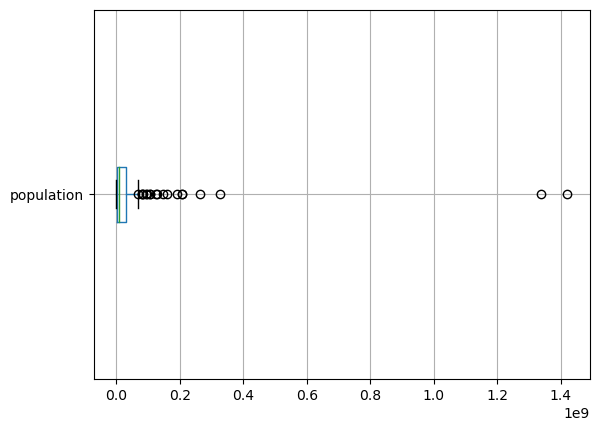

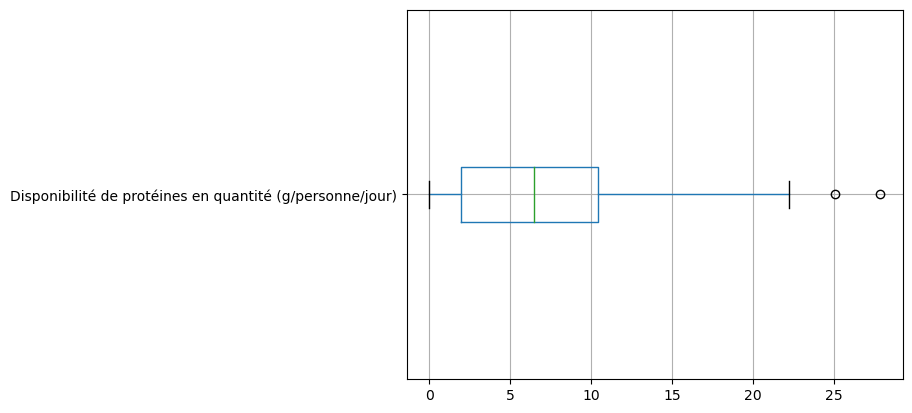

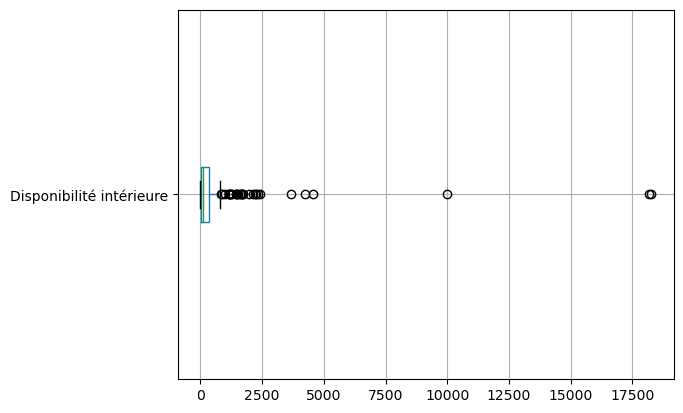

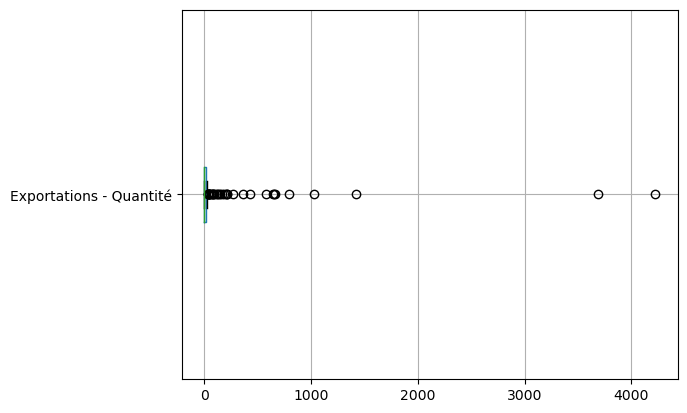

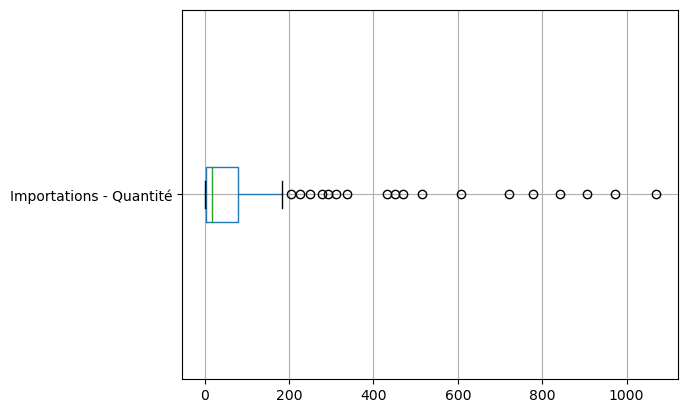

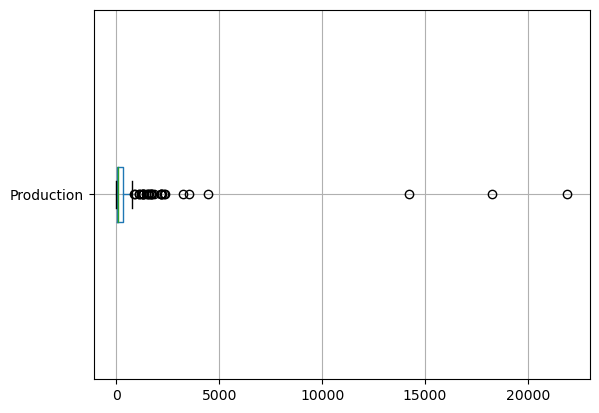

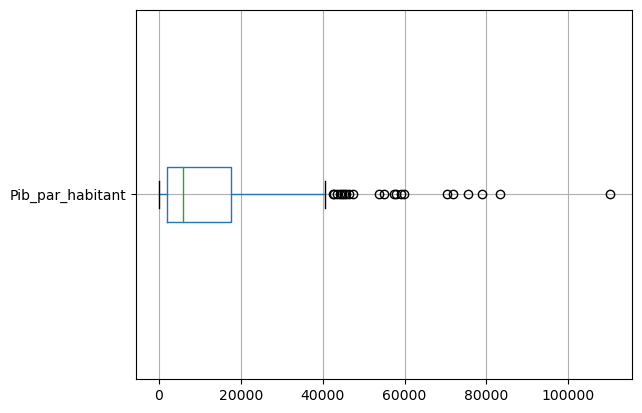

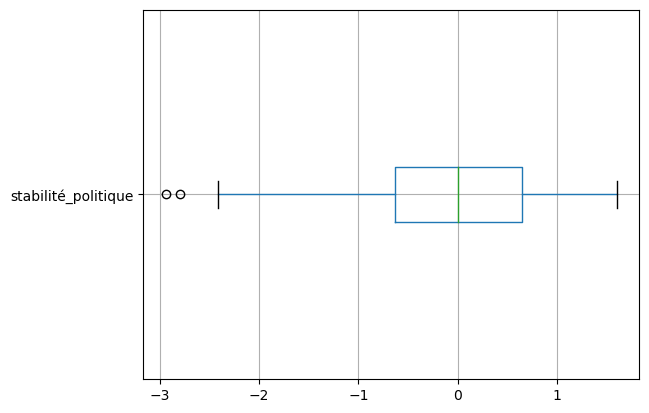

In [240]:
#affichage des boxplot pour chaque variable pour identifier les outliers
import matplotlib.pyplot as plt
df.boxplot(column='population', vert=False)
plt.show()
df.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', vert=False)
plt.show()
df.boxplot(column='Disponibilité intérieure', vert=False)
plt.show()
df.boxplot(column='Exportations - Quantité', vert=False)
plt.show()
df.boxplot(column='Importations - Quantité', vert=False)
plt.show()
df.boxplot(column='Production', vert=False)
plt.show()
df.boxplot(column='Pib_par_habitant', vert=False)
plt.show()
df.boxplot(column='stabilité_politique', vert=False)
plt.show()


In [241]:
#Identification des outliers sur population 
Q1 = df['population'].quantile(q=0.25)
Q3 = df['population'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)


-37675615.0
69199713.0


In [242]:
#identification des outliers sur population
df_outliers=df.loc[(df['population']>limite_outliers_sup)]
df_outliers.sort_values(by=['population'], ascending = False).head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
33,"Chine, continentale",1.421022e+09,3.96,18161.0,576.0,452.0,18236.0,14243.500000,0.00
72,Inde,1.338677e+09,0.75,3661.0,4.0,0.0,3545.0,1937.924543,-0.76
52,États-Unis d'Amérique,3.250848e+08,19.93,18266.0,3692.0,123.0,21914.0,59059.596403,0.29
73,Indonésie,2.646510e+08,2.42,2323.0,0.0,1.0,2301.0,3839.785075,-0.50
120,Pakistan,2.079062e+08,1.97,1282.0,4.0,2.0,1281.0,1558.080077,-2.41


==>les outliers sur population c'est pas des valeurs abberantes mais des pays a forte population  

In [243]:
#Identification des outliers dans Disponibilité de protéines en quantité (g/personne/jour)
Q1 = df['Disponibilité de protéines en quantité (g/personne/jour)'].quantile(q=0.25)
Q3 = df['Disponibilité de protéines en quantité (g/personne/jour)'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)

-10.734999999999998
23.144999999999996


In [244]:
df.loc[(df['Disponibilité de protéines en quantité (g/personne/jour)']>limite_outliers_sup)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
78,Israël,8243848.0,27.87,636.0,3.0,0.0,629.0,42756.825063,-0.89
141,Saint-Vincent-et-les Grenadines,109827.0,25.10,8.0,1.0,9.0,0.0,8030.568916,0.89


In [245]:
df.loc[(df['Disponibilité de protéines en quantité (g/personne/jour)']<limite_outliers_inf)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique


==>les outliers sur 'Disponibilité de protéines en quantité (g/personne/jour)ne sont pas des valeurs abberantes mais des pays qui ont une forte consommation de proteine 

In [246]:
#Identification des outliers dans Disponibilité intérieure 
Q1 = df['Disponibilité intérieure'].quantile(q=0.25)
Q3 = df['Disponibilité intérieure'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)

-440.5
811.5


In [247]:
df.loc[(df['Disponibilité intérieure']>limite_outliers_sup)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
1,Afrique du Sud,5.700976e+07,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28
4,Allemagne,8.265841e+07,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59
7,Arabie saoudite,3.310118e+07,15.57,1435.0,10.0,722.0,616.0,20138.146333,-0.64
8,Argentine,4.393714e+07,13.53,1962.0,207.0,8.0,2161.0,14609.783370,0.17
10,Australie,2.458462e+07,16.60,1171.0,42.0,16.0,1269.0,57430.803788,0.90
23,Brésil,2.078338e+08,15.68,9982.0,4223.0,3.0,14201.0,9896.717511,-0.47
29,Canada,3.673210e+07,13.86,1433.0,163.0,182.0,1417.0,45125.109808,1.10
33,"Chine, continentale",1.421022e+09,3.96,18161.0,576.0,452.0,18236.0,14243.500000,0.00
36,Colombie,4.890984e+07,9.57,1643.0,2.0,78.0,1564.0,6450.319585,-0.77
45,Égypte,9.644259e+07,4.51,1250.0,1.0,110.0,1118.0,1917.049576,-1.42


In [248]:
df.loc[(df['Disponibilité intérieure']<limite_outliers_inf)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique


==>les outliers se sont les pays a forte disponibilité intérieures 

In [249]:
#Identification des outliers dans exporation quantité 
Q1 = df['Exportations - Quantité'].quantile(q=0.25)
Q3 = df['Exportations - Quantité'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)

-18.0
30.0


In [250]:
df.loc[(df['Exportations - Quantité']>limite_outliers_sup)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
1,Afrique du Sud,5.700976e+07,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28
4,Allemagne,8.265841e+07,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59
8,Argentine,4.393714e+07,13.53,1962.0,207.0,8.0,2161.0,14609.783370,0.17
10,Australie,2.458462e+07,16.60,1171.0,42.0,16.0,1269.0,57430.803788,0.90
11,Autriche,8.819901e+06,7.49,173.0,78.0,110.0,148.0,47429.535841,1.05
16,Bélarus,9.450231e+06,9.41,265.0,152.0,21.0,463.0,5637.218565,-0.05
17,Belgique,1.141975e+07,4.57,152.0,656.0,338.0,463.0,44162.256256,0.43
23,Brésil,2.078338e+08,15.68,9982.0,4223.0,3.0,14201.0,9896.717511,-0.47
24,Bulgarie,7.102444e+06,8.74,157.0,45.0,108.0,107.0,8242.455771,0.33
29,Canada,3.673210e+07,13.86,1433.0,163.0,182.0,1417.0,45125.109808,1.10


==>les outliers ne sont pas des valeures abbérantes mais les pays qui exportent beaucoup 

In [251]:
df.loc[(df['Exportations - Quantité']<limite_outliers_inf)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique


==>les outliers se sont les pays trés exportateurs de poulets

In [252]:
#Identification des outliers sur importation_quantité
Q1 = df['Importations - Quantité'].quantile(q=0.25)
Q3 = df['Importations - Quantité'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)

-111.0
193.0


In [253]:
df.loc[(df['Importations - Quantité']>limite_outliers_sup)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
1,Afrique du Sud,5.700976e+07,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28
4,Allemagne,8.265841e+07,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59
5,Angola,2.981677e+07,3.60,319.0,0.0,277.0,42.0,4042.681403,-0.38
7,Arabie saoudite,3.310118e+07,15.57,1435.0,10.0,722.0,616.0,20138.146333,-0.64
17,Belgique,1.141975e+07,4.57,152.0,656.0,338.0,463.0,44162.256256,0.43
31,Chine - RAS de Hong-Kong,7.306322e+06,22.26,280.0,663.0,907.0,24.0,45737.483211,0.83
33,"Chine, continentale",1.421022e+09,3.96,18161.0,576.0,452.0,18236.0,14243.500000,0.00
41,Cuba,1.133925e+07,7.12,342.0,0.0,312.0,29.0,8543.360968,0.65
47,Émirats arabes unis,9.487203e+06,14.80,412.0,94.0,433.0,48.0,42522.377617,0.62
49,Espagne,4.664743e+07,12.47,1497.0,212.0,205.0,1515.0,28190.806667,0.28


In [254]:
df.loc[(df['Importations - Quantité']<limite_outliers_inf)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique


==> les ouliers se sont les pays qui importent énormément

In [255]:
#identification des outliers sur production

Q1 = df['Production'].quantile(q=0.25)
Q3 = df['Production'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)

-482.5
833.5


In [256]:
df.loc[(df['Production']>limite_outliers_sup)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
1,Afrique du Sud,5.700976e+07,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28
4,Allemagne,8.265841e+07,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59
8,Argentine,4.393714e+07,13.53,1962.0,207.0,8.0,2161.0,14609.783370,0.17
10,Australie,2.458462e+07,16.60,1171.0,42.0,16.0,1269.0,57430.803788,0.90
23,Brésil,2.078338e+08,15.68,9982.0,4223.0,3.0,14201.0,9896.717511,-0.47
29,Canada,3.673210e+07,13.86,1433.0,163.0,182.0,1417.0,45125.109808,1.10
33,"Chine, continentale",1.421022e+09,3.96,18161.0,576.0,452.0,18236.0,14243.500000,0.00
36,Colombie,4.890984e+07,9.57,1643.0,2.0,78.0,1564.0,6450.319585,-0.77
45,Égypte,9.644259e+07,4.51,1250.0,1.0,110.0,1118.0,1917.049576,-1.42
49,Espagne,4.664743e+07,12.47,1497.0,212.0,205.0,1515.0,28190.806667,0.28


In [257]:
df.loc[(df['Production']<limite_outliers_inf)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique


==>les outliers se sont les pays fort producteurs de poulets

In [258]:
#Identification des outliers sur PIB_par_habitant
Q1 = df['Pib_par_habitant'].quantile(q=0.25)
Q3 = df['Pib_par_habitant'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)

-21532.0870105
41054.6104655


In [259]:
df.loc[(df['Pib_par_habitant']>limite_outliers_sup)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59
10,Australie,24584620.0,16.60,1171.0,42.0,16.0,1269.0,57430.803788,0.90
11,Autriche,8819901.0,7.49,173.0,78.0,110.0,148.0,47429.535841,1.05
17,Belgique,11419748.0,4.57,152.0,656.0,338.0,463.0,44162.256256,0.43
29,Canada,36732095.0,13.86,1433.0,163.0,182.0,1417.0,45125.109808,1.10
31,Chine - RAS de Hong-Kong,7306322.0,22.26,280.0,663.0,907.0,24.0,45737.483211,0.83
32,Chine - RAS de Macao,622585.0,11.90,19.0,0.0,23.0,3.0,78985.632295,1.43
34,"Chine, Taiwan Province de",23674546.0,11.01,785.0,8.0,161.0,652.0,59842.200000,1.00
42,Danemark,5732274.0,12.97,167.0,139.0,133.0,173.0,57888.203513,0.87
47,Émirats arabes unis,9487203.0,14.80,412.0,94.0,433.0,48.0,42522.377617,0.62


In [260]:
df.loc[(df['Pib_par_habitant']<limite_outliers_inf)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique


==>les outliers se sont les pays avec un trés fort PIB 

In [261]:
#Identification des outliers sur stabilité_politique 
Q1 = df['stabilité_politique'].quantile(q=0.25)
Q3 = df['stabilité_politique'].quantile(q=0.75)
Iq = Q3 - Q1

limite_outliers_inf = Q1-1.5*Iq
limite_outliers_sup = Q3+1.5*Iq
print(limite_outliers_inf)
print(limite_outliers_sup)

-2.55
2.57


In [262]:
df.loc[(df['stabilité_politique']>limite_outliers_sup)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique


In [263]:
df.loc[(df['stabilité_politique']<limite_outliers_inf)]

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80
169,Yémen,27834819.0,3.04,246.0,0.0,78.0,168.0,612.353054,-2.94


==>les outliers se sont les pays trés instables

In [264]:
df.to_csv('df.csv',index=False)